## Introduction

My fantasy football league, 10 Guys One Cup, has been drafting and playing since about 2012. 2014, we made a couple large changes. The league grew from 10 to 12 people and the draft style changed from the common "Snake" method to the "Auction" method. We also meet every year to do the auction in person. With that, ESPN unfortunately does not collect the auction values of each individual player. The source is the league's own Excel sheet that tracks the player prices. This is manually compiled by me for the source data of each player and their corresponding Auction Draft prices.

This exploratory analysis looks at prices of players over time to evaluate the league's premium on positions. The preferred outcome is to find value at a certain position that may lead to a higher remaining budget that can be spent in a better way further downstream. Keep in mind that every team member starts the Auction with $200.

### Important Years
2014: 12-team League

2016: 10-team League

2019: Tight Ends are now allowed to be played as a "flex", whereas before the flex position was exclusive to running backs and wide receivers.

### Function and Libraries
First we import the necessary libraries and output the necessary functions into the environment.

In [1]:
library(readxl)
library(tidyverse)
library(RColorBrewer)
library(gridExtra)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'gridExtra' was built under R version 3.6.2"
Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine



In [2]:
#function for entire position prices by year
yearly_graphic <- function(dollar_switch, #whether or not $1 players to be included
                           pos, #2-letter abbreviation for position
                           color, #color for bar graph
                           full_pos #full position title to include in graphic title
                           ) {
  
  #max y limit on graphic
  temp <- rep(0, length(list_of_years))
  for (i in 1:length(list_of_years)) {
    temp[i] <- source %>% 
      filter(Year == list_of_years[i]) %>% 
      filter(Position == eval(substitute(pos))) %>% 
      filter(Price > 1) %>% 
      pull(Price) %>% 
      mean()
  }
  y_max <- max(temp)
  
  if (dollar_switch == 0) {
    #each year, mean price per year
    prices <- rep(0, length(list_of_years))
    for (i in 1:length(list_of_years)) {
      prices[i] <- source %>% 
        filter(Year == list_of_years[i]) %>% 
        filter(Position == eval(substitute(pos))) %>% 
        pull(Price) %>% 
        mean()
    }
    
    #actual image code
    graphic <- tibble(list_of_years, prices) %>% 
      ggplot(aes(x = list_of_years, y = prices)) +
      geom_bar(stat = "identity", colour = "black",
               fill = eval(substitute(color)), alpha = 0.7) +
      theme_bw() +
      scale_x_continuous(labels = as.character(list_of_years),
                         breaks = list_of_years) +
      labs(x = "Year",
           y = "Price",
           title = paste("Average",
                         eval(substitute(full_pos)),
                         "Price Per Year")) +
      ylim(0, y_max)
  } else {
    prices <- rep(0, length(list_of_years))
    for (i in 1:length(list_of_years)) {
      prices[i] <- source %>% 
        filter(Year == list_of_years[i]) %>% 
        filter(Position == eval(substitute(pos))) %>% 
        filter(Price > 1) %>% 
        pull(Price) %>% 
        mean()
    }
    graphic <- tibble(list_of_years, prices) %>% 
      ggplot(aes(x = list_of_years, y = prices)) +
      geom_bar(stat = "identity", colour = "black",
               fill = eval(substitute(color)), alpha = 0.7) +
      theme_bw() +
      scale_x_continuous(labels = as.character(list_of_years),
                         breaks = list_of_years) +
      labs(x = "Year",
           y = "Price",
           title = paste("Average",
                         eval(substitute(full_pos)),
                         "Price Per Year (No $1 Players)")) +
      ylim(0, y_max)
  }
  return(graphic)
}

#function for players drafted multiple years (usually 5 or 6 out of 6)
longitudinal_graphic <- function(name, #string for player name
                                 the_color, #color
                                 player_list #vector of player names
                                 ) {
  y_max <- source %>% 
    filter(Player %in% player_list) %>% 
    pull(Price) %>% 
    max()
  source %>% 
    filter(Player == eval(substitute(name))) %>% 
    ggplot(aes(x = Year, y = Price)) +
    geom_bar(stat = "identity", colour = "black",
             fill = the_color, alpha = 0.8) +
    theme_bw() +
    labs(x = "Year",
         y = "Price",
         title = eval(substitute(name))) +
    scale_x_continuous(labels = as.character(list_of_years),
                       breaks = list_of_years) +
    ylim(0, y_max)
}

#function to output vector of prices: average of position by year
prices_vector <- function(dollar_switch, #whether or not $1 players to be included
                          pos #2-letter abbreviation for position
                          ) {
  #initialize empty vector
  prices <- rep(0, length(list_of_years))
  
  #implement binary switch
  if (dollar_switch == 0) {
    for (i in 1:length(list_of_years)) {
      prices[i] <- source %>% 
        filter(Position == eval(substitute(pos))) %>% 
        filter(Year == list_of_years[i]) %>% 
        pull(Price) %>% 
        mean()
    }
  } else {
    for (i in 1:length(list_of_years)) {
      prices[i] <- source %>% 
        filter(Position == eval(substitute(pos))) %>% 
        filter(Year == list_of_years[i]) %>% 
        filter(Price > 1) %>% 
        pull(Price) %>% 
        mean()
    }
  }
  return(as.numeric(format(round(prices, 1), nsmall = 1)))
}

Now we import the raw data, which is provided to you.

In [3]:
#import the data
source <- read_excel("C:/Users/NTellaku/Documents/R/ff/10 Guys 1 Cup/Drafted Players.xlsx",
                     sheet = "All Years")

#list of all years in the auction draft thus far
list_of_years <- unique(source$Year)
list_of_years

[1] 2014 2015 2016 2017 2018 2019

The <code>list_of_years</code> object is, as it states, a vector of all the years in the draft data set. The <code>source</code> Data Frame contains the player drafted, the year, position, price, and drafter.

In [4]:
head(source)

Player,Position,Price,Year,Owner
Robert Griffin III,QB,7,2014,Naki
LeSean McCoy,RB,68,2014,Naki
Frank Gore,RB,31,2014,Naki
Keenan Allen,WR,26,2014,Naki
Golden Tate,WR,6,2014,Naki
Riley Cooper,WR,8,2014,Naki


### Table 1: Dollar Players
As mentioned above, we want to observe the number of players are going for $1. This will give us an idea to see if people are paying more for the players they want up front at the cost of the latter half of their draft.

In [5]:
table1 <- t(full_join(source %>%
                        group_by(Year) %>% 
                        filter(Price == 1) %>% 
                        summarise(dp = n()),
                      #first counting the $1 players, then all the drafted playres
                      source %>%
                        group_by(Year) %>% 
                        summarise(tot = n()),
                      by = "Year") %>% 
              #percentage of dollar playres
              mutate(pct = format(round(dp / tot * 100, 2), nsmall = 2),
                     pct2 = paste(pct, "%", sep = "")) %>% 
              select(-tot, -pct, -Year) %>% 
              rename("Dollar Players" = dp,
                     "% Dollar Players" = pct2))
colnames(table1) <- list_of_years
table1

,2014,2015,2016,2017,2018,2019
Dollar Players,48,50,41,40,42,53
% Dollar Players,26.67%,28.74%,27.52%,27.21%,30.22%,38.41%


An important fact to keep note of when looking at the 50 --> 41 drop off from 2015 to 2016 is that the league size reduced from 12 to 10. Overall, from 2014 to 2017, the $1 players stayed consistent as a percentage. Starting in 2018 and especially 2019, that number started to increase, and pretty significantly. With that in mind, we can assume that league members are more willing to draft a few "studs" and solid players with promising returns that take some more risks. This could open up a certain value of players where taking a risk may be worth it. A lower price spent on the player, but overall season point returns equal to a proven "stud".

With this insight, we will take a look at position prices over the years. This will allow us to see if there is a target position where we can be a little more risky.

### Table 2: Average Price of Position by Year

We use the function defined above to find the prices of each position over the year. All positions except for quarterbacks are also subset to not include dollar players. This is to try and control for extra roster space and bench fillers taken at the end of the draft

In [6]:
qb_prices <- prices_vector(0, "QB")
rb_prices <- prices_vector(0, "RB")
rb_prices_no1 <- prices_vector(1, "RB")
wr_prices <- prices_vector(0, "WR")
wr_prices_no1 <- prices_vector(1, "WR")
te_prices <- prices_vector(0, "TE")
te_prices_no1 <- prices_vector(1, "TE")


#creating the average dollar value per position into a table
table2 <- as_tibble(t(tibble(qb_prices,
                             rb_prices,
                             rb_prices_no1,
                             wr_prices,
                             wr_prices_no1,
                             te_prices,
                             te_prices_no1)))
colnames(table2) <- list_of_years
rownames(table2) <- c("QB", "RB", "RB > 1", "WR",
                            "WR > 1", "TE", "TE > 1")

table2

Warning message:
"`as_tibble.matrix()` requires a matrix with column names or a `.name_repair` argument. Using compatibility `.name_repair`.
This warning is displayed once per session."Warning message:
"Setting row names on a tibble is deprecated."

,2014,2015,2016,2017,2018,2019
QB,12.9,10.8,5.5,7.6,6.4,3.9
RB,16.6,18.2,16.6,18.4,19.0,19.7
RB > 1,21.6,24.3,19.7,23.6,27.9,31.0
WR,12.9,13.9,15.1,13.6,15.5,15.9
WR > 1,15.9,17.7,21.0,19.3,20.8,23.7
TE,10.0,8.1,9.2,7.8,7.6,9.4
TE > 1,14.9,11.0,13.4,9.8,11.8,14.5


The table is nice, but this type of data is better understood visualized.

### Graphics

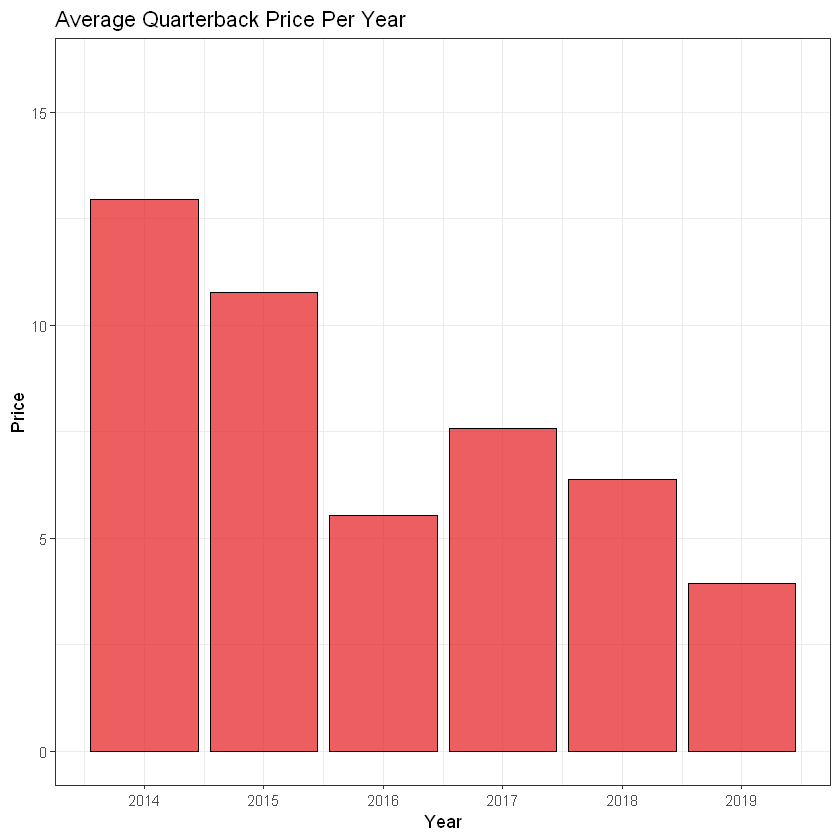

In [7]:
yearly_colors <- brewer.pal(4, "Set1")
qb_yearly <- yearly_graphic(0, "QB", yearly_colors[1], "Quarterback")
qb_yearly

The <code>yearly_colors</code> object is a manual setting to select 4 colors for the images. They will be used for QBs, RBs, WRs, and TEs respectively.

Looking at the QB prices over the years, there's definitely a trend downwards. In the case of my fantasy football league, league members are valuing the QB less, as points seem relatively uniformly distributed among all QBs. For example, besides outliers such as Mahomes in 2018 and Lamar Jackson in 2019, the range of points between QB3 and QB10 isn't that large. Therefore, no one wants to pay a premium on QBs when those dollars can be spent towards other skill positions and by sacrificing a couple points with their quarterback.
As the league only starts 1 QB, we include $1 players in calculating the mean of QB prices. The league's devaluation of the QB position in fantasy football is rather apparent.

People also seem to want to "hit" on the QB phenomenon. Mahomes and Jackson have near-record or record-setting seasons and both went for $1 in this league for each of their first year starting.

In [8]:
source %>% filter(Player %in% c("Patrick Mahomes", "Lamar Jackson"))

Player,Position,Price,Year,Owner
Patrick Mahomes,QB,1,2018,Mount
Lamar Jackson,QB,1,2019,Naki
Patrick Mahomes,QB,17,2019,Kooper


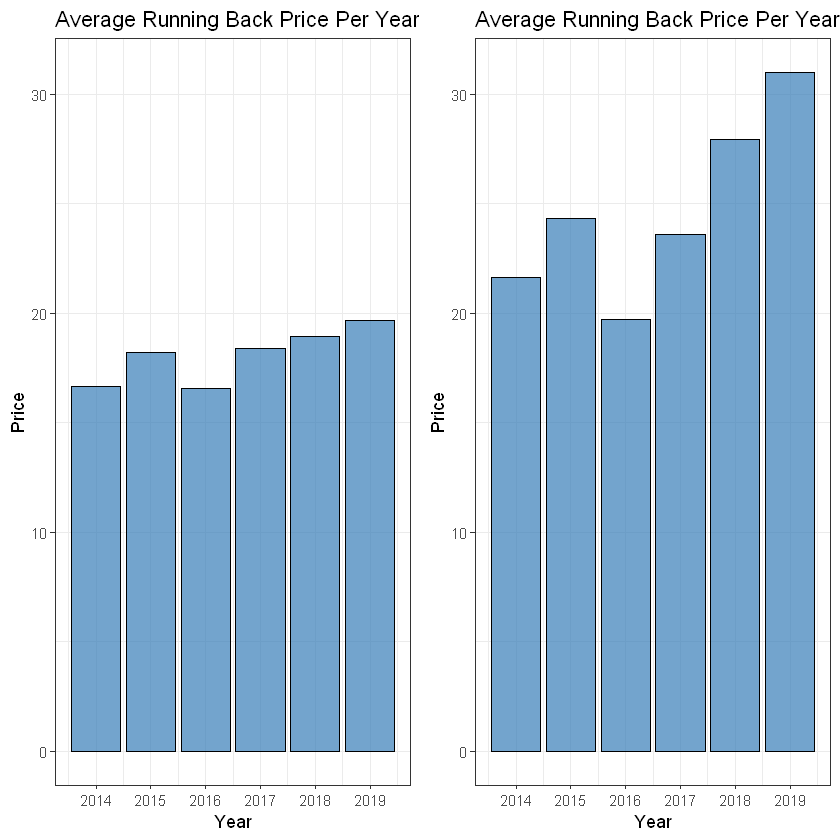

In [9]:
rb_yearly <- yearly_graphic(0, "RB", yearly_colors[2], "Running Back")
rb_yearly_no1 <- yearly_graphic(1, "RB", yearly_colors[2], "Running Back")
grid.arrange(rb_yearly, rb_yearly_no1, ncol = 2)

The running back comparison is straightforward. Skill players demand more in an auction. With more teams switching to a Running Back by Committee (RBBC) scheme, true bellcows that play the bulk of snaps are going at a premium. This becomes more apparent when bench filler, aka  $1 players are removed.

The same trend is observed for the wide receivers. Although with WRs, there really is no "committee", as multiple receivers play on each snap. WRs may just be following a similar trend as the RBs.

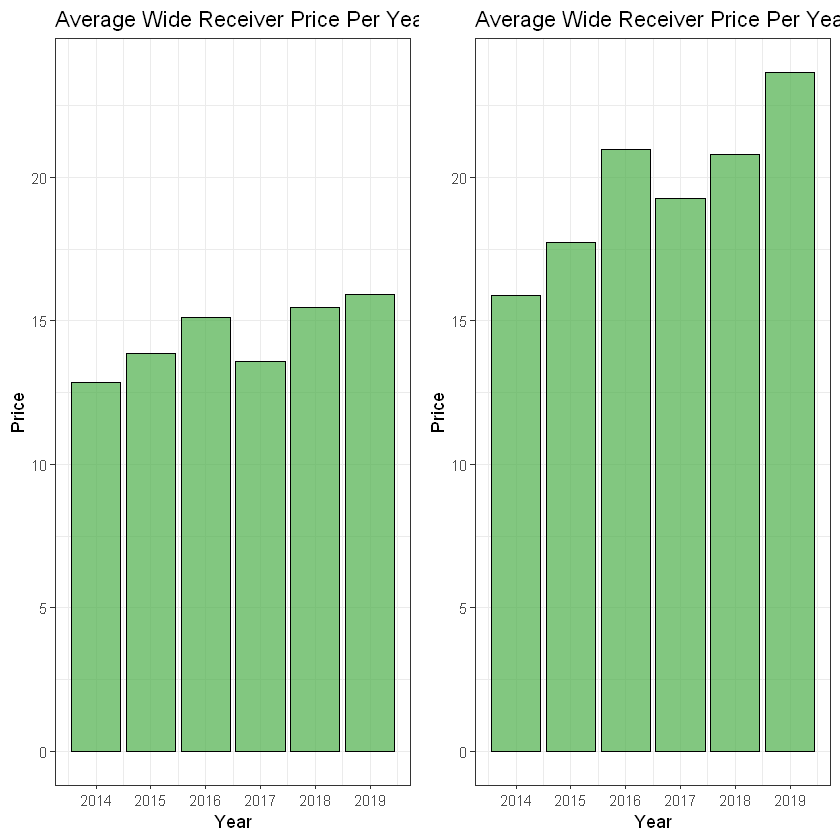

In [10]:
wr_yearly <- yearly_graphic(0, "WR", yearly_colors[3], "Wide Receiver")
wr_yearly_no1 <- yearly_graphic(1, "WR", yearly_colors[3], "Wide Receiver")
grid.arrange(wr_yearly, wr_yearly_no1, ncol = 2)

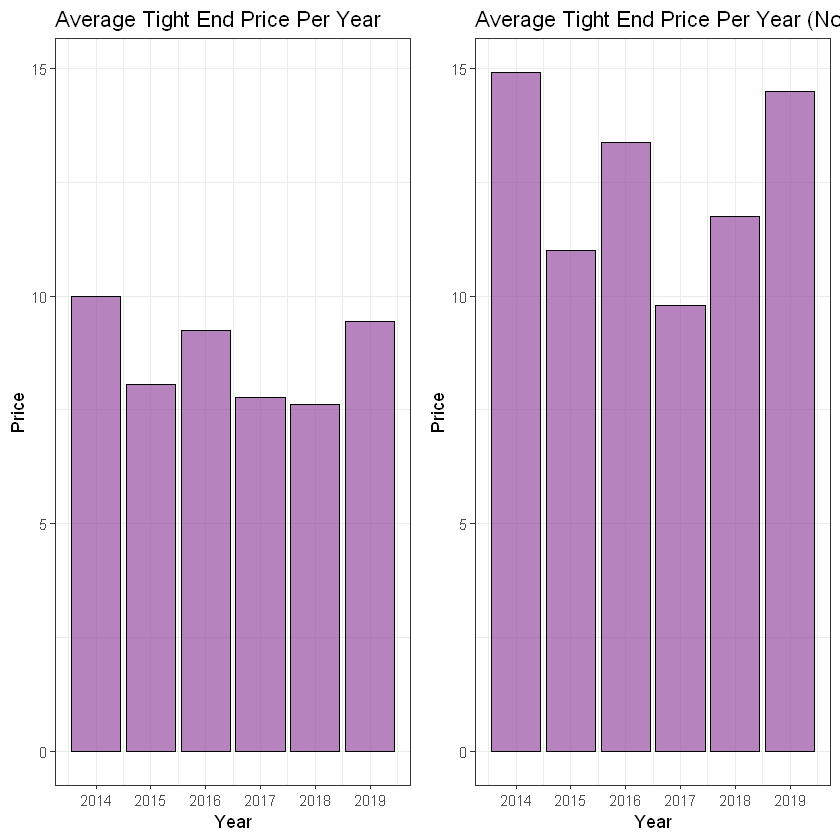

In [11]:
te_yearly <- yearly_graphic(0, "TE", yearly_colors[4], "Tight End")
te_yearly_no1 <- yearly_graphic(1, "TE", yearly_colors[4], "Tight End")
grid.arrange(te_yearly, te_yearly_no1, ncol = 2)

Tight End prices over the years are a bit more random and hard to get a read on. Multiple factors are involved: change in league size, fewer top-tier Tight Ends with Gronk retiring and Jimmy Graham not playing well, and TE playability in the flex spot. More or less uniform average prices, whether or not dollar players are included. Tight Ends data doesn't allow us to draw any inference. The position seems to be a yearly crapshoot, with a few excellent players (Kittle, Kelce) and a lot of filler. A potential exploratory analysis that would help here is how to value a premium TE. Would spending the extra money on Kittle ($20 instead of a dollar for any other filler TE) be worth taking that money away from spending on other skill positions such as RB or WR? Especially since those position prices have been observed to increase over time.

### Repeat Drafted Players
With overall trends out of the way, let's focus on players that have consistently been or projected to have been at the top of their position. Or in our case, players that have been drafted often. The players shown below have been drafted at least 5 out of the 6 years this league has had the auction style draft.

#### Kickers

Warning message in brewer.pal(2, "Accent"):
"minimal value for n is 3, returning requested palette with 3 different levels
"

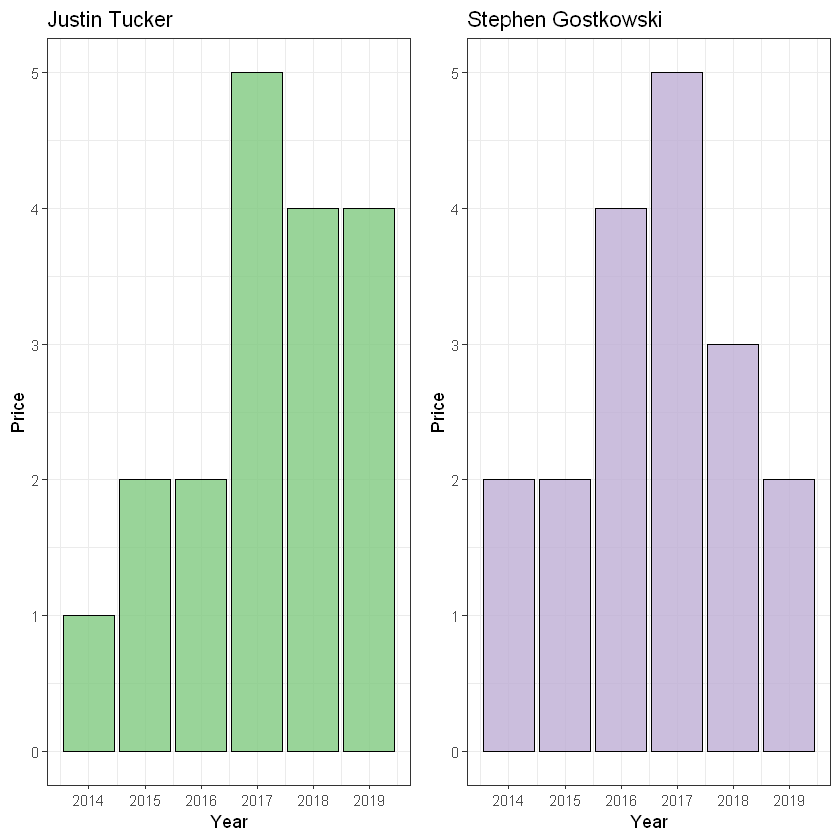

In [12]:
#vector of players
common_k <- plyr::count(source %>%
                          filter(Position == "K") %>%
                          select(Player)) %>% 
  filter(freq >= 5) %>% 
  pull(Player)

#conditional to get the colors for the players
color_k <- brewer.pal(2, "Accent")

#initializing an empty list
graphics_list_k <- list()

#loop through all the players and store the images in the list
for (i in 1:length(common_k)) {
  graphics_list_k[[i]] <- longitudinal_graphic(common_k[i],
                                               color_k[i],
                                               common_k)
}
grid.arrange(graphics_list_k[[1]], graphics_list_k[[2]], ncol = 2)

#### Quarterbacks
Overall, we can once again see how the league values QBs less. Important Note: Andrew Luck retired in 2019, but his announcement was made after our draft.

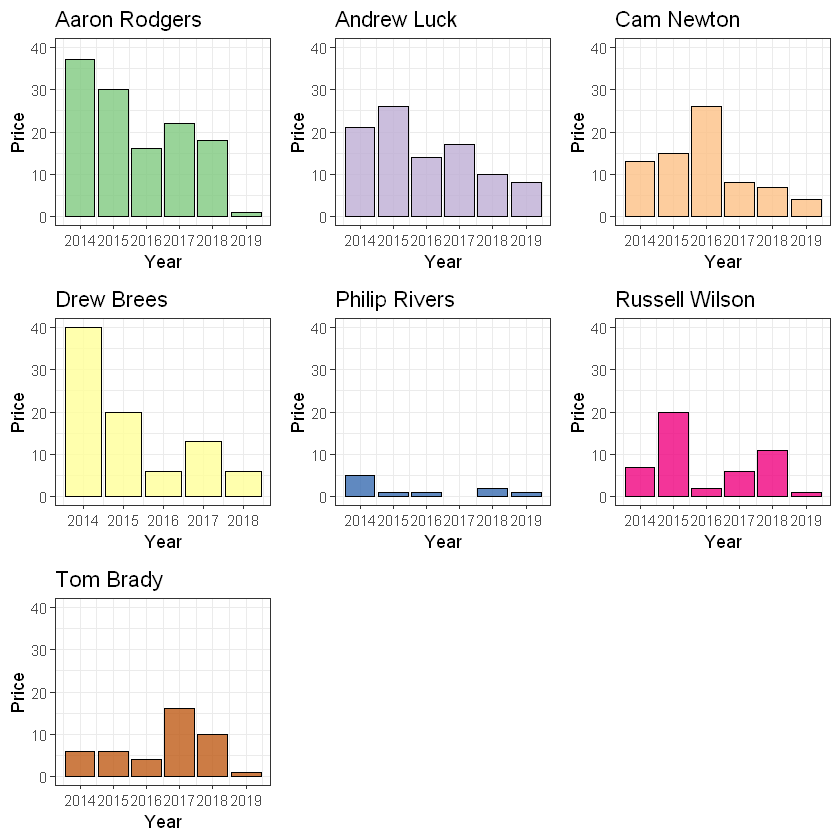

In [13]:
#vector of players
common_qb <- plyr::count(source %>%
                           filter(Position == "QB") %>%
                           select(Player)) %>% 
  filter(freq >= 5) %>% 
  pull(Player)

#conditional to get the colors for the players
color_qb <- brewer.pal(7, "Accent")

#initializing an empty list
graphics_list_qb <- list()

#loop through all the players and store the images in the list
for (i in 1:length(common_qb)) {
  graphics_list_qb[[i]] <- longitudinal_graphic(common_qb[i],
                                                color_qb[i],
                                                common_qb)
}
grid.arrange(graphics_list_qb[[1]], graphics_list_qb[[2]],
             graphics_list_qb[[3]], graphics_list_qb[[4]],
             graphics_list_qb[[5]], graphics_list_qb[[6]],
             graphics_list_qb[[7]],
             ncol = 3)

This visual of QBs drafted helps an insight into auction style drafting. Aaron Rodgers has been and continues to be at least a top 10 Fantasy QB. However, the way the league drafted in 2019, he was forgotten up until league members were at their last few dollars. In fact, he was forgotten to a point where everyone had the budget for only dollar players. So, Aaron Rodgers, who in years past averaged to $25 a year, was drafted for a single dollar.

#### Tight Ends

Jimmy Graham suffered a ruptured patella tendon leading him to go undrafted in 2018. Gronk retired (for the first time?? in 2019). Jordan Reed is seemingly always concussed. As Graham and Gronk fall off the map, we see a rise in the next group of top Tight Ends: Travis Kelce and Zach Ertz.

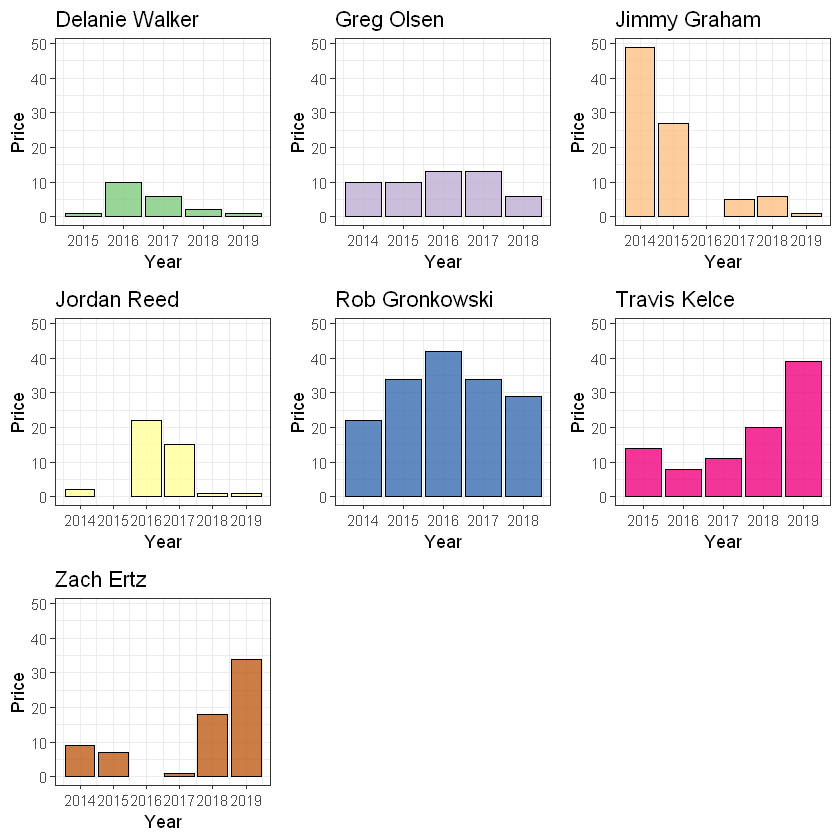

In [14]:
#vector of players
common_te <- plyr::count(source %>%
                           filter(Position == "TE") %>%
                           select(Player)) %>% 
  filter(freq >= 5) %>% 
  pull(Player)

#conditional to get the colors for the players
color_te <- brewer.pal(7, "Accent")

#initializing an empty list
graphics_list_te <- list()

#loop through all the players and store the images in the list
for (i in 1:length(common_te)) {
  graphics_list_te[[i]] <- longitudinal_graphic(common_te[i],
                                                color_te[i],
                                                common_te)
}
grid.arrange(graphics_list_te[[1]], graphics_list_te[[2]],
             graphics_list_te[[3]], graphics_list_te[[4]],
             graphics_list_te[[5]], graphics_list_te[[6]],
             graphics_list_te[[7]], ncol = 3)

#### Running Backs

Although Ezekiel Elliott and David Johnson have only been drafted 4 consecutive years, I included them to add some emphasis on their consistent, immense values.

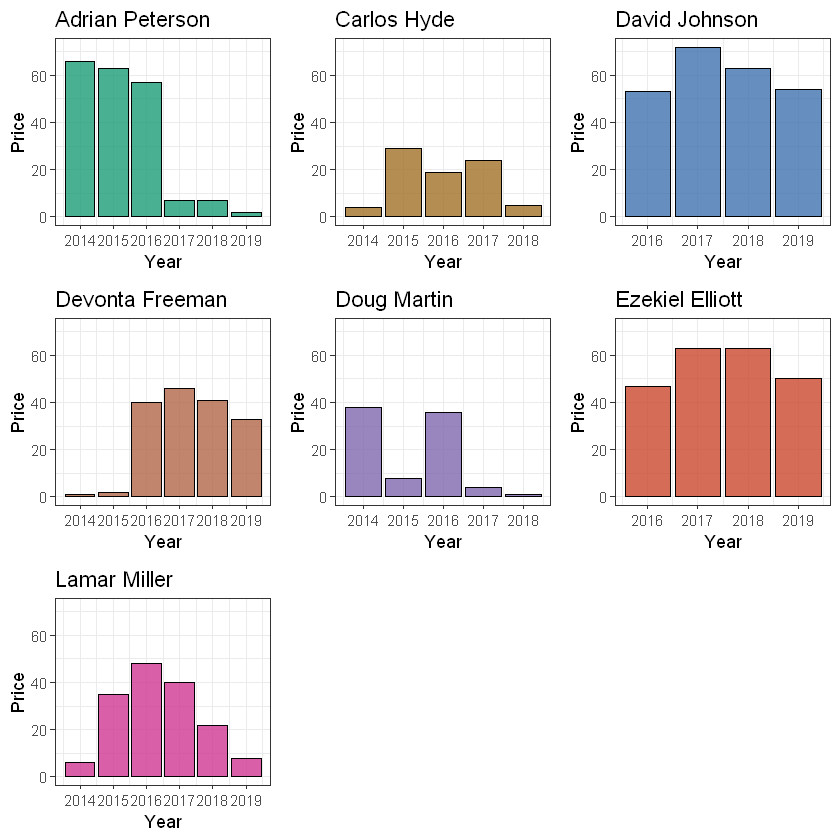

In [15]:
#vector of players
common_rb <- plyr::count(source %>%
                           filter(Position == "RB") %>%
                           select(Player)) %>% 
  filter(freq >= 5) %>% 
  pull(Player)

#conditional to get the colors for the players
color_rb <- colorRampPalette(brewer.pal(8, "Dark2"))(11)

#initializing an empty list
graphics_list_rb <- list()

#loop through all the players and store the images in the list
for (i in 1:length(common_rb)) {
  graphics_list_rb[[i]] <- longitudinal_graphic(common_rb[i],
                                                color_rb[i],
                                                common_rb)
}

zeke <- source %>% 
  filter(Player == "Ezekiel Elliott") %>% 
  ggplot(aes(x = Year, y = Price)) +
  geom_bar(stat = "identity", colour = "black",
           fill = "#C9472D", alpha = 0.8) +
  theme_bw() +
  labs(x = "Year",
       y = "Price",
       title = "Ezekiel Elliott") +
  scale_x_continuous(labels = as.character(list_of_years),
                     breaks = list_of_years) +
  ylim(0, 72)

dj <- source %>% 
  filter(Player == "David Johnson") %>% 
  ggplot(aes(x = Year, y = Price)) +
  geom_bar(stat = "identity", colour = "black",
           fill = "#4072AF", alpha = 0.8) +
  theme_bw() +
  labs(x = "Year",
       y = "Price",
       title = "David Johnson") +
  scale_x_continuous(labels = as.character(list_of_years),
                     breaks = list_of_years) +
  ylim(0, 72)

grid.arrange(graphics_list_rb[[1]], graphics_list_rb[[2]], dj,
             graphics_list_rb[[3]], graphics_list_rb[[4]], zeke,
             graphics_list_rb[[5]], ncol = 3)

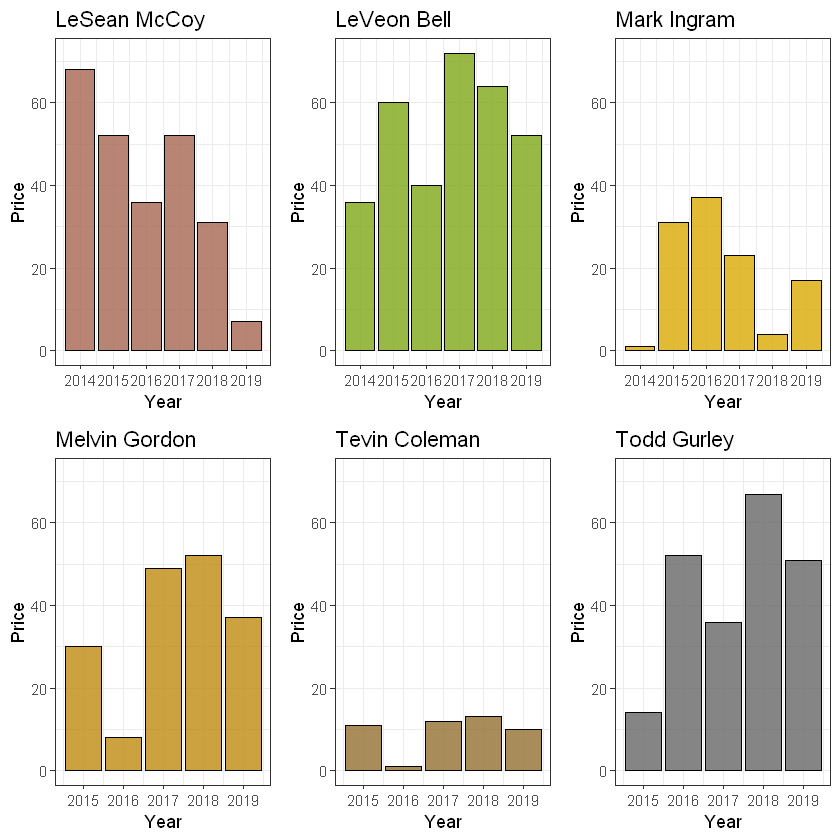

In [16]:
grid.arrange(graphics_list_rb[[6]],
             graphics_list_rb[[7]], graphics_list_rb[[8]],
             graphics_list_rb[[9]], graphics_list_rb[[10]],
             graphics_list_rb[[11]], ncol = 3)

#### Wide Receivers
AJ Green had ankle surgery before the 2019 season started, which affected his draft price. DeAndre Hopkins suffered Brock Osweiler as his QB which caused his 2017 price dip. Demaryius Thomas tore his achilles in 2019 and thus wasn't drafted. The same happened to Emmanuel Sanders. Doug Baldwin and Jordy Nelson retired after the 2018 season, the latter wasting it with the Raiders. Kelvin Benjamin ate himself out of the league after the 2018 season in Buffalo.

Interesting but evident: how many fewer RBs that play at a high level consistently compared to WRs.

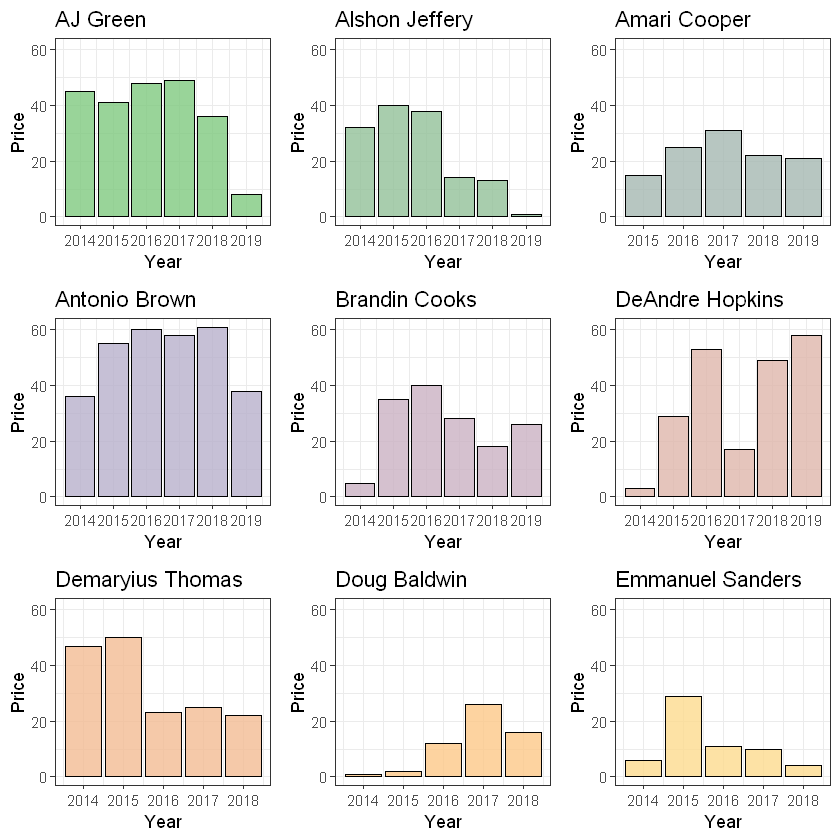

In [17]:
common_wr <- plyr::count(source %>%
                           filter(Position == "WR") %>%
                           select(Player)) %>% 
  filter(freq >= 5) %>% 
  pull(Player)

#conditional to get the colors for the players
color_wr <- colorRampPalette(brewer.pal(8, "Accent"))(24)

#initializing an empty list
graphics_list_wr <- list()

#loop through all the players and store the images in the list
for (i in 1:length(common_wr)) {
  graphics_list_wr[[i]] <- longitudinal_graphic(common_wr[i],
                                                color_wr[i],
                                                common_wr)
}

grid.arrange(graphics_list_wr[[1]], graphics_list_wr[[2]],
             graphics_list_wr[[3]], graphics_list_wr[[4]],
             graphics_list_wr[[5]], graphics_list_wr[[6]],
             graphics_list_wr[[7]], graphics_list_wr[[8]],
             graphics_list_wr[[9]], ncol = 3)

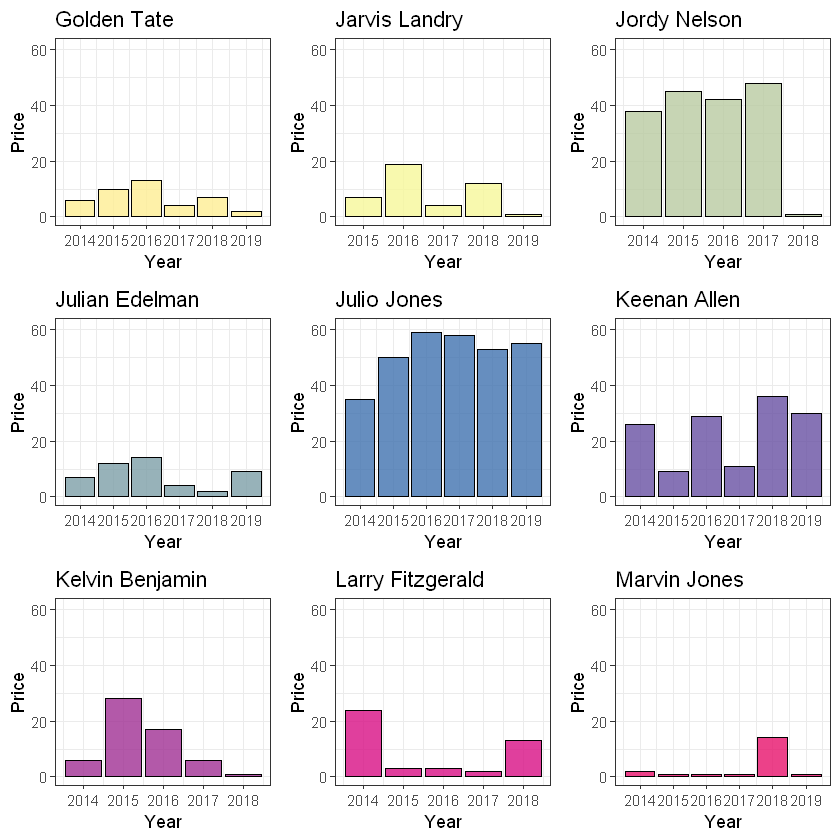

In [18]:
grid.arrange(graphics_list_wr[[10]], graphics_list_wr[[11]],
             graphics_list_wr[[12]], graphics_list_wr[[13]],
             graphics_list_wr[[14]], graphics_list_wr[[15]],
             graphics_list_wr[[16]], graphics_list_wr[[17]],
             graphics_list_wr[[18]], ncol = 3)

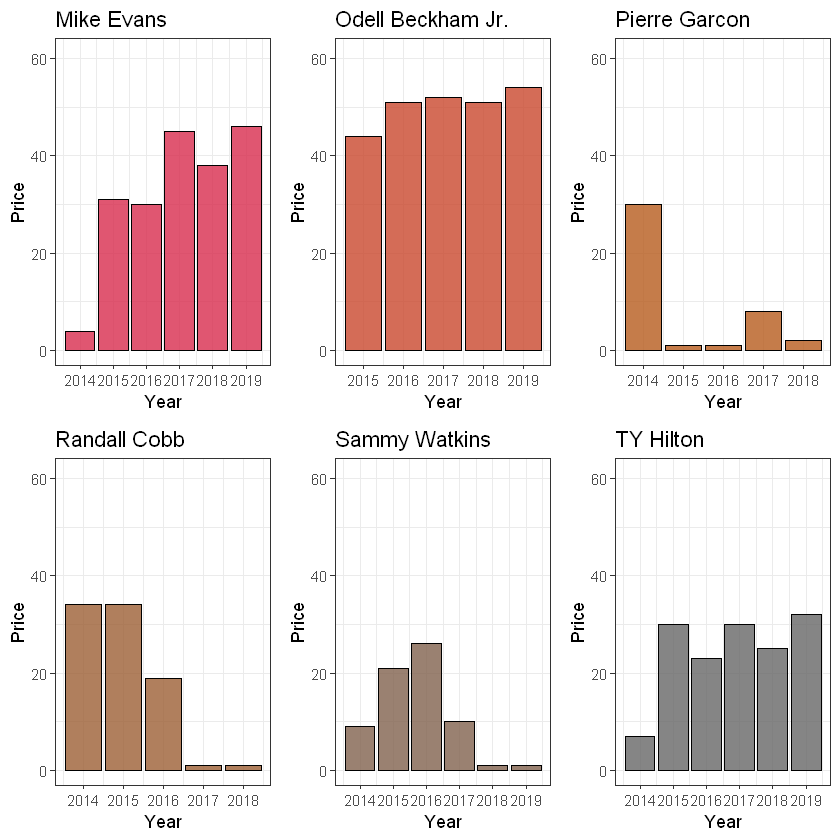

In [19]:
grid.arrange(graphics_list_wr[[19]], graphics_list_wr[[20]],
             graphics_list_wr[[21]], graphics_list_wr[[22]],
             graphics_list_wr[[23]], graphics_list_wr[[24]], ncol = 3)